In [15]:
"""
後で使う関数の定義
"""

def linestyle_generator():
    """グラフをプロットするときの線種を決めるジェネレータ"""
    linestyle = ['-', '--', '-.', ':']
    lineID = 0
    while True:
        yield linestyle[lineID]
        lineID = (lineID + 1) % len(linestyle)

def plot_set(fig_ax, *args):
    """グラフを整える"""
    fig_ax.set_xlabel(args[0])
    fig_ax.set_ylabel(args[1])
    fig_ax.grid(ls=':')
    if len(args) == 3:
        fig_ax.legend(loc=args[2])

def bodeplot_set(fig_ax, *args):
    """ボード線図を整える"""
    # ゲイン線図
    fig_ax[0].grid(which="both", ls=':')
    fig_ax[0].set_ylabel('Gain [dB]')

    # 位相線図
    fig_ax[1].grid(which="both", ls=':')
    fig_ax[1].set_xlabel('omega [rad/s]')
    fig_ax[1].set_ylabel('Phase [deg]')

    # 凡例
    if len(args) > 0:
        fig_ax[1].legend(loc=args[0])
    if len(args) > 1:
        fig_ax[0].legend(loc=args[1])

In [16]:
from control.matlab import tf, tfdata

P1 = tf([1], [1, 1])
print(f'P1: {P1.poles()}')

P2 = tf([1], [-1, 1])
print(f'P2: {P2.poles()}')

P1: [-1.+0.j]
P2: [1.+0.j]


In [17]:
P3 = tf([1], [1, 0.05, 1])
print(f'P3: {P3.poles()}')

P4 = tf([1], [1, -0.05, 1])
print(f'P4: {P4.poles()}')

P3: [-0.025+0.99968745j -0.025-0.99968745j]
P4: [0.025+0.99968745j 0.025-0.99968745j]


In [18]:
import numpy as np

[[Np]], [[Dp]] = tfdata(P4)
print(f"{Dp=}")
print(f"roots: {np.roots(Dp)}")

Dp=array([ 1.  , -0.05,  1.  ])
roots: [0.025+0.99968745j 0.025-0.99968745j]


In [19]:
A = np.array([[0, 1], [-4, -5]])

# A の固有値はすべて負なので、x' = A x + B u は漸近安定
np.linalg.eigvals(A)

array([-1., -4.])

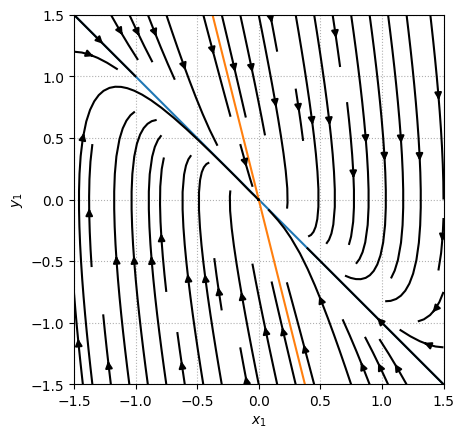

In [24]:
from matplotlib import pyplot as plt

w = 1.5
Y, X = np.mgrid[-w: w: 100j, -w: w: 100j]

A = np.array([[0, 1], [-4, -5]])
s, v = np.linalg.eig(A) # 固有ベクトル v と固有値 s

U = A[0, 0] * X + A[0, 1] * Y
V = A[1, 0] * X + A[1, 1] * Y

t = np.arange(-1.5, 1.5, 0.01)
fig, ax = plt.subplots()

if s.imag[0] == 0 and s.imag[1] == 0:
    ax.plot(t, v[1, 0] / v[0, 0] * t, ls='-')
    ax.plot(t, v[1, 1] / v[0, 1] * t, ls='-')

ax.streamplot(X, Y, U, V, density=0.7, color='k')
ax.set_ylim(-1.5, 1.5)  # y軸の範囲を設定
ax.set_xlim(-1.5, 1.5)  # 念のためx軸の範囲も明示
ax.set_aspect('equal')  # 軸の比率を正方形に設定
plot_set(ax, '$x_1$', '$y_1$')

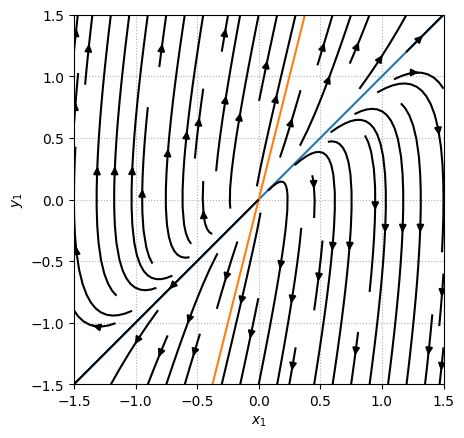

In [25]:
"""
練習問題
"""

w = 1.5
Y, X = np.mgrid[-w: w: 100j, -w: w: 100j]

A = np.array([[0, 1], [-4, 5]])
s, v = np.linalg.eig(A) # 固有ベクトル v と固有値 s

U = A[0, 0] * X + A[0, 1] * Y
V = A[1, 0] * X + A[1, 1] * Y

t = np.arange(-1.5, 1.5, 0.01)
fig, ax = plt.subplots()

if s.imag[0] == 0 and s.imag[1] == 0:
    ax.plot(t, v[1, 0] / v[0, 0] * t, ls='-')
    ax.plot(t, v[1, 1] / v[0, 1] * t, ls='-')

ax.streamplot(X, Y, U, V, density=0.7, color='k')
ax.set_ylim(-1.5, 1.5)  # y軸の範囲を設定
ax.set_xlim(-1.5, 1.5)  # 念のためx軸の範囲も明示
ax.set_aspect('equal')  # 軸の比率を正方形に設定
plot_set(ax, '$x_1$', '$y_1$')